In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("K:\Computer Science\Brand_Reputation_Management_System\sentiment_analysis\data_preprocessing\processed_dataset.csv")
df.head()
print(df['sentiment'].value_counts())
df = df.dropna(subset=['cleaned_review', 'sentiment'])

X = df['cleaned_review']
y = df['sentiment']

sentiment
positive    307625
negative     48822
neutral      28070
Name: count, dtype: int64


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
bow_vectorizer = CountVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test) 

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [4]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
}

In [5]:
results = {}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:")

    # Train and evaluate on TF-IDF features
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[f"{model_name} (TF-IDF)"] = accuracy
    print(f"{model_name} Classification Report (TF-IDF):")
    print(classification_report(y_test, y_pred))

    # Train and evaluate on BOW features
    model.fit(X_train_bow, y_train)
    y_pred = model.predict(X_test_bow)
    accuracy = accuracy_score(y_test, y_pred)
    results[f"{model_name} (BOW)"] = accuracy
    print(f"{model_name} Classification Report (BOW):")
    print(classification_report(y_test, y_pred))


Evaluating Logistic Regression:
Logistic Regression Classification Report (TF-IDF):
              precision    recall  f1-score   support

    negative       0.71      0.74      0.72      9800
     neutral       0.43      0.15      0.22      5690
    positive       0.92      0.97      0.95     61376

    accuracy                           0.88     76866
   macro avg       0.69      0.62      0.63     76866
weighted avg       0.86      0.88      0.86     76866



k:\Computer Science\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report (BOW):
              precision    recall  f1-score   support

    negative       0.71      0.70      0.71      9800
     neutral       0.40      0.16      0.23      5690
    positive       0.92      0.97      0.94     61376

    accuracy                           0.88     76866
   macro avg       0.68      0.61      0.63     76866
weighted avg       0.85      0.88      0.86     76866


Evaluating Naive Bayes:
Naive Bayes Classification Report (TF-IDF):
              precision    recall  f1-score   support

    negative       0.83      0.34      0.48      9800
     neutral       0.40      0.00      0.00      5690
    positive       0.84      1.00      0.91     61376

    accuracy                           0.84     76866
   macro avg       0.69      0.44      0.46     76866
weighted avg       0.81      0.84      0.79     76866

Naive Bayes Classification Report (BOW):
              precision    recall  f1-score   support

    negative       0.65 


Overall Model Performance:
                          Model  Accuracy
0  Logistic Regression (TF-IDF)  0.881443
1     Logistic Regression (BOW)  0.877358
2          Naive Bayes (TF-IDF)  0.838797
3             Naive Bayes (BOW)  0.852249
4        Random Forest (TF-IDF)  0.863542
5           Random Forest (BOW)  0.864726


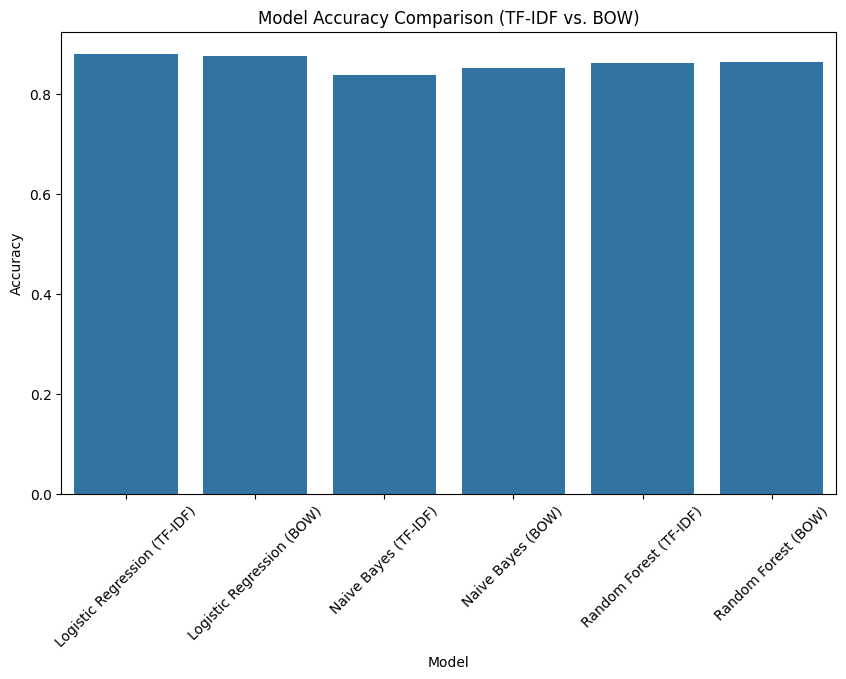

In [6]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nOverall Model Performance:")
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison (TF-IDF vs. BOW)")
plt.xticks(rotation=45)
plt.show()